*Models classifier applied on the dataset and it contains the accuracy comparison plot*

In [1]:
import warnings
from decimal import Decimal
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")

In [2]:
df_comb = pd.read_csv("Dataset/dis_sym_dataset_comb.csv")

# creation of features and label for training the models
X = df_comb.iloc[:, 1:]
Y = df_comb.iloc[:, 0:1]

*Train Test Split*

In [3]:
# splitting data for training the classifiers and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)

In [4]:
# lists used for accuracy plotting
accuracy_list = []
cross_accuracy_list = []
model_list = []

# *Logistic Regression Classifier*
it follows (one vs rest) approach when dealing with multi class classification

In [5]:
lr = LogisticRegression()
lr = lr.fit(X, Y)
# prediction of labels for the test data
lr_pred = lr.predict(x_test)
acc_lr = round(Decimal(accuracy_score(y_test, lr_pred) * 100), 2)
accuracy_list.append(acc_lr)
model_list.append("LR")
print(f"Accuracy (LR) : {acc_lr}%")

# Cross Validation Accuracy LR with 5 different splits
scores_lr = cross_val_score(lr, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_lr.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (LR): {score}%")

Accuracy (LR) : 91.18%
Cross Validation Accuracy (LR): 89.19%


*Support Vector Machine Classifier*

SVM follows OvO (One Vs One) approach when dealing with multi class classification.In our classification problem we have 261 classes (equal to diseases).

In [6]:
svm = SVC()
svm = svm.fit(X, Y)
# prediction of labels for the test data
svm_pred = svm.predict(x_test)
acc_svm = round(Decimal(accuracy_score(y_test, svm_pred) * 100), 2)
accuracy_list.append(acc_svm)
model_list.append("SVM")
print(f"Accuracy (SVM) : {acc_svm}%")

# Cross Validation Accuracy SVM with 5 different splits
scores_svm = cross_val_score(svm, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_svm.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (SVM): {score}%")

Accuracy (SVM) : 91.29%
Cross Validation Accuracy (SVM): 88.62%


*Decision Tree Classifier*

In [7]:
dt = DecisionTreeClassifier()
dt = dt.fit(X, Y)
# prediction of labels for the test data
dt_pred = dt.predict(x_test)
acc_dt = round(Decimal(accuracy_score(y_test, dt_pred) * 100), 2)
accuracy_list.append(acc_dt)
model_list.append("DT")
print(f"Accuracy (DT) : {acc_dt}%")

# Cross Validation Accuracy DT with 5 different splits
scores_dt = cross_val_score(dt, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_dt.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (DT): {score}%")

Accuracy (DT) : 92.08%
Cross Validation Accuracy (DT): 83.69%


*Accuracy Comparison Plot for all the classifiers*

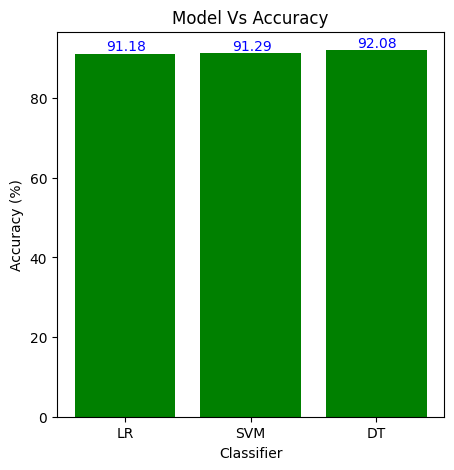

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.title("Model Vs Accuracy")
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.bar(model_list, accuracy_list, color='green')
for i, j in enumerate(accuracy_list):
    plt.text(float(i)-0.15, float(j)+0.7, str(j), color='blue')
plt.show()


*Cross Validation Accuracy Comparison Plot for all the classifiers*

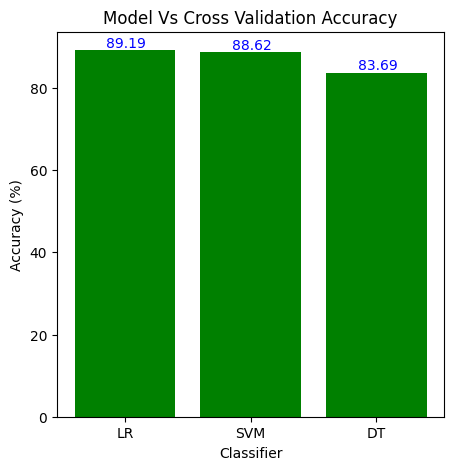

In [9]:
plt.style.use('default')  # Use default style
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
plt.title("Model Vs Cross Validation Accuracy")
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.bar(model_list, cross_accuracy_list, color='green')
for i, j in enumerate(cross_accuracy_list):
    ax.text(float(i)-0.15, float(j)+0.7, str(j), color='blue')
plt.show()
